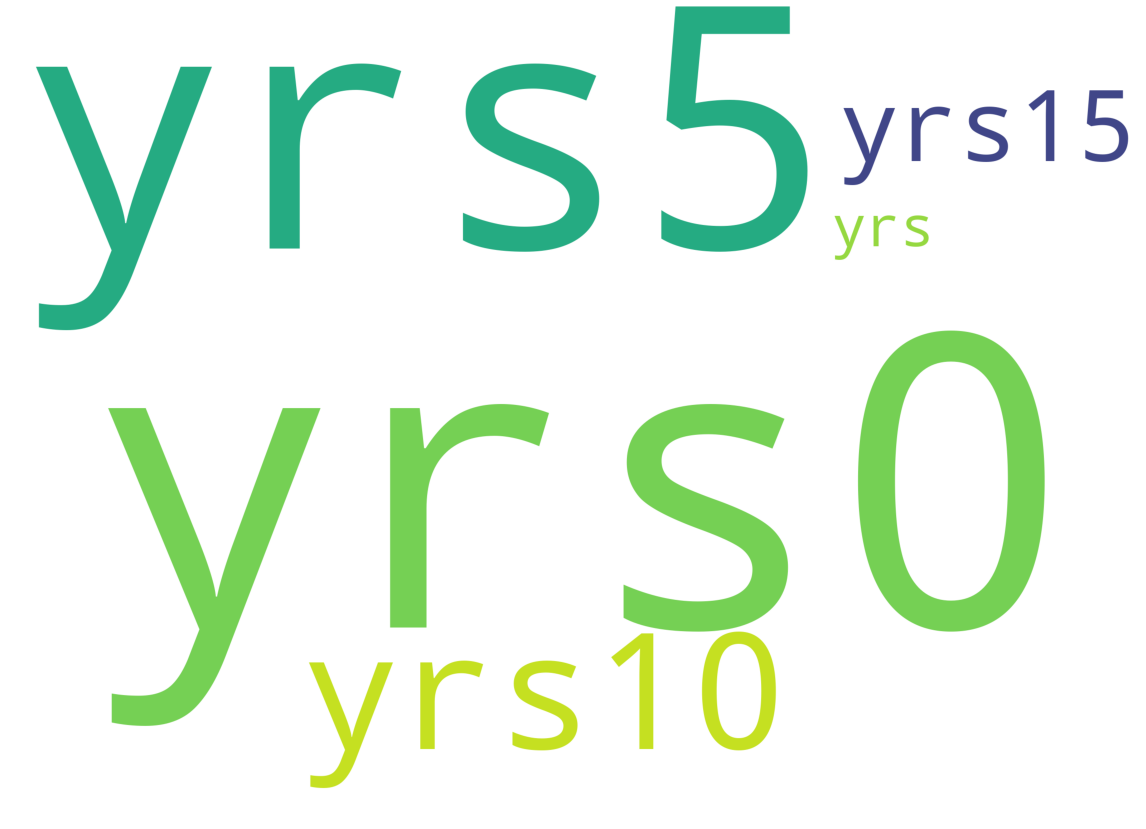

NameError: name 'label_binarize' is not defined

NameError: name 'label_binarize' is not defined

In [4]:
%run RandomForestMulticlassClassification.ipynb

In [172]:
data.head()

,Sex,Weight,Heart_rhythm,Type_of_implant,rct,hct,creatini,dvg1,fe1,paps1,...,infection,followup,fe2,dvg2,paps2,im2,Death2,Redo,Type_of_condition,Age_group
0,F,11.0,Sinus arrhythmia,NONE,65,35.0,38.0,55,57,60,...,0,26,62,42,30,1.5,alive,NO,NONE,0-4 yrs
1,F,5.0,Sinus arrhythmia,NONE,50,37.0,35.0,39,65,55,...,0,31,61,41,25,2.0,alive,NO,NONE,0-4 yrs
2,F,18.0,Sinus arrhythmia,BAND,55,40.0,30.0,58,68,75,...,0,242,67,41,30,3.5,alive,YES,MR,5-9 yrs
3,F,20.0,Sinus arrhythmia,RING,62,38.0,38.0,63,62,55,...,0,240,70,38,25,2.0,alive,NO,NONE,10-14 yrs
4,M,45.0,Sinus arrhythmia,RING,55,40.0,65.0,69,73,35,...,0,228,63,49,30,2.0,alive,NO,NONE,15-18 yrs


In [27]:
X = data.drop(columns=['Type_of_condition'], axis=1)
X = X.apply(LabelEncoder().fit_transform)
X

,Sex,Weight,Heart_rhythm,Type_of_implant,rct,hct,creatini,dvg1,fe1,paps1,...,Death,infection,followup,fe2,dvg2,paps2,im2,Death2,Redo,Age_group
0,0,12,1,1,6,6,10,26,11,7,...,0,0,6,12,14,4,3,0,0,0
1,0,2,1,1,0,8,8,11,19,6,...,0,0,8,11,13,1,4,0,0,0
2,0,19,1,0,2,11,5,29,22,10,...,0,0,76,17,13,4,7,0,1,3
3,0,21,1,2,5,9,10,32,16,6,...,0,0,75,20,10,1,4,0,0,1
4,1,38,1,2,2,11,36,35,27,2,...,0,0,71,13,21,4,4,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,0,16,1,0,2,9,23,13,9,0,...,0,0,3,11,8,4,4,0,0,0
115,1,12,1,0,4,4,12,10,22,2,...,0,0,6,16,1,4,4,0,0,0
116,0,16,1,2,2,5,18,12,19,1,...,0,0,9,10,4,1,2,0,0,0
117,0,3,1,1,0,3,10,4,30,7,...,0,0,7,18,1,1,4,0,0,0


In [28]:
from imblearn.over_sampling import SMOTE
from collections import Counter

y = LabelEncoder().fit_transform(data["Type_of_condition"])

oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

counter = Counter(y)
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))

Class=2, n=95 (33.333%)
Class=0, n=95 (33.333%)
Class=1, n=95 (33.333%)


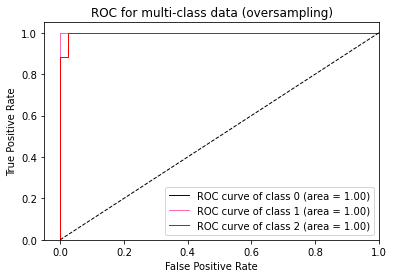

In [64]:
from sklearn.preprocessing import label_binarize
import itertools

y = label_binarize(y, classes=[0,1,2])

# split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

# fit the model using the training set and make predictions using the test set
classifier = OneVsRestClassifier(RandomForestClassifier(n_estimators=5, max_depth=4, random_state=0))
model = classifier.fit(X_train, y_train)
y_pred = classifier.predict_proba(X_test)

# plot ROC-AUC curve
#y_true = np.argmax(y_test, axis=1)
n_classes = 3

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

colors = itertools.cycle(['navy', 'hotpink', 'red'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=1,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for multi-class data (oversampling)')
plt.legend(loc="lower right")
plt.show()

Confusion matrix, without normalization
[[17  0  0]
 [ 0 23  0]
 [ 0  0 17]]


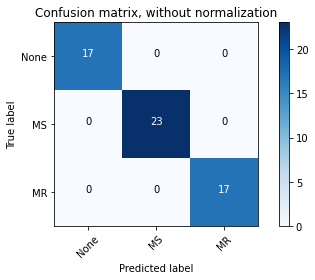

In [66]:
from sklearn.metrics import confusion_matrix

y_true = np.argmax(y_test, axis=1)
y_predict = np.argmax(y_pred, axis=1)
CM = confusion_matrix(y_true, y_predict)

#from ipynb.fs.full.plotfunction import plot_confusion_matrix

import matplotlib.pyplot as plt 
import numpy as np

def plot_confusion_matrix(cm, classes,
                          normalize=False, 
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

plt.figure()
plot_confusion_matrix(CM, classes=['None', 'MS', 'MR'],
                      title='Confusion matrix, without normalization')

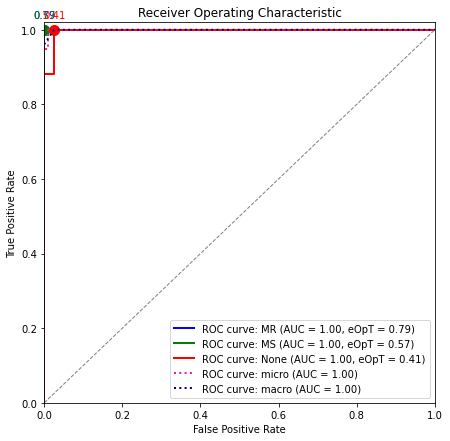

{'MR': {'auc': 1.0, 'eopt': 0.7905128205128206},
 'MS': {'auc': 1.0, 'eopt': 0.5683808147752615},
 'None': {'auc': 0.9970588235294117, 'eopt': 0.41143410852713186},
 'ax': <matplotlib.axes._subplots.AxesSubplot at 0x107a37640>}

In [67]:
target_names = ['MR', 'MS', 'None']
roc_graph(y_test, y_pred, class_names = target_names, figsize=(7,7))

In [69]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_predict, target_names=target_names))

              precision    recall  f1-score   support

          MR       1.00      1.00      1.00        17
          MS       1.00      1.00      1.00        23
        None       1.00      1.00      1.00        17

    accuracy                           1.00        57
   macro avg       1.00      1.00      1.00        57
weighted avg       1.00      1.00      1.00        57



In [137]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

test = SelectKBest(score_func=chi2, k=4)

#Fit the function for ranking the features by score

fit = test.fit(X, y)

#Summarize scores
np.set_printoptions(suppress=True)
print(fit.scores_)

[ 24.024  52.007   0.007  99.481  18.907   1.189  16.36   80.018  17.797
 103.884  15.011  20.015 926.12  511.694 319.294 196.948  47.494  94.496
  11.611   9.255   9.323 106.048  39.536 115.492  10.307  26.375  10.
   6.        nan   6.5   555.574 105.046  33.376  71.126 115.475   2.
  95.     24.725]


In [98]:
X.columns

Index(['Sex', 'Weight', 'Heart_rhythm', 'Type_of_implant', 'rct', 'hct',
       'creatini', 'dvg1', 'fe1', 'paps1', 'am1', 'imtype1', 'GRADMIT1',
       'GRADMIT2', 'Oper_date', 'imtype2', 'bandelet', 'Ring_Group', 'tcec',
       'tclampag', 'cpg', 'ticu', 'tventil', 'thospit', 'Heart_failure',
       'arhythmias', 'pericaeffusion', 'Kidney_failure', 'Death', 'infection',
       'followup', 'fe2', 'dvg2', 'paps2', 'im2', 'Death2', 'Redo',
       'Age_group'],
      dtype='object')

In [148]:
new_X = pd.DataFrame(data = X.columns)
new_X["scores"] = fit.scores_
new_X.columns = ['Features', 'Scores']
top15 = new_X.nlargest(15,'Scores')
top15

,Features,Scores
12,GRADMIT1,926.120039
30,followup,555.573852
13,GRADMIT2,511.694071
14,Oper_date,319.294096
15,imtype2,196.947561
23,thospit,115.491719
34,im2,115.474729
21,ticu,106.047809
31,fe2,105.045895
9,paps1,103.884058


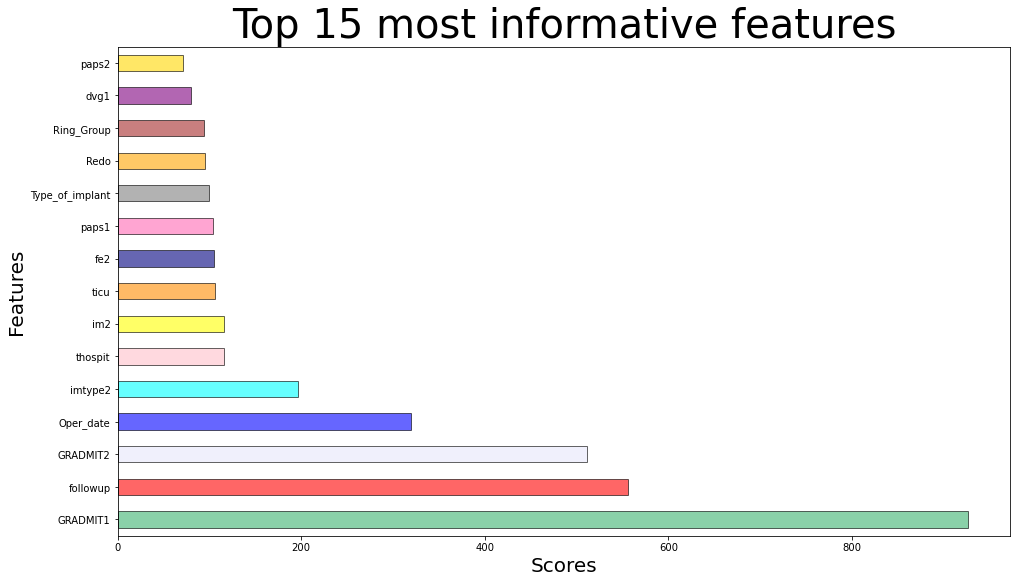

In [176]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [16,9]

top15.plot.barh(x='Features', y='Scores',
                color=['mediumseagreen', 'red', 'lavender', 'blue', 'cyan', 'pink','yellow', 'darkorange', 'navy', 'hotpink',
                       'gray', 'orange', 'brown', 'purple', 'gold'], legend=None, edgecolor = 'black', alpha=0.6)
plt.xlabel('Scores', fontsize= 20)
plt.ylabel('Features', fontsize= 20)
plt.title(label = 'Top 15 most informative features', fontsize=40)
plt.show()

In [110]:
# SIDE: SORT ARRAY 
fit.scores_ = fit.scores_[~np.isnan(fit.scores_)]

sorted_index_array = np.argsort(fit.scores_) 
  
# sorted array 
sorted_array = fit.scores_[sorted_index_array] 
n = 10
  
# we are using negative 
# indexing concept 
  
# find n largest value 
rslt = sorted_array[-n : ] 
  
# show the output 
print(rslt) 

[103.884 105.046 106.048 115.475 115.492 196.948 319.294 511.694 555.574
 926.12 ]


In [174]:
from sklearn.feature_selection import SelectKBest, f_classif
#Suppose, we select 5 features with top 5 Fisher scores
selector = SelectKBest(f_classif, k = 4)


#New dataframe with the selected features for later use in the classifier. fit() method works too, if you want only the feature names and their corresponding scores
X_new = selector.fit_transform(X, y)
names = X.columns.values[selector.get_support()]
scores = selector.scores_[selector.get_support()]
names_scores = list(zip(names, scores))
ns_df = pd.DataFrame(data = names_scores, columns=['Feat_names', 'F_Scores'])
#Sort the dataframe for better visualization
ns_df_sorted = ns_df.sort_values(['F_Scores', 'Feat_names'], ascending = [False, True])
print(ns_df_sorted)

        Feat_names    F_Scores
3             Redo         inf
1         GRADMIT1  138.109280
0  Type_of_implant  126.540798
2              im2  117.335844


/Users/retina840/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [28 36] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
/Users/retina840/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
/Users/retina840/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
